## Chap 1  Exploring market risk-factors

course is based on extracts from

book:  **Quantitative Risk Management Concepts, Techniques and Tools**

by: Alexander McNeil, Rudiger Frey, Paul Ebrechts

**Managing Riks:**
* Selling assets, diversifying portfolios, heding
* Maintaining sufficient capital to withstand losses

**Value-at-risk (VaR) is a well-known measure of risk**

#### Risk Factors
* value of portfolio depends on many risk factors
* e.g.  equity indexes/prices, fx rates, interest ratse

Loading required package: qrmdata
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



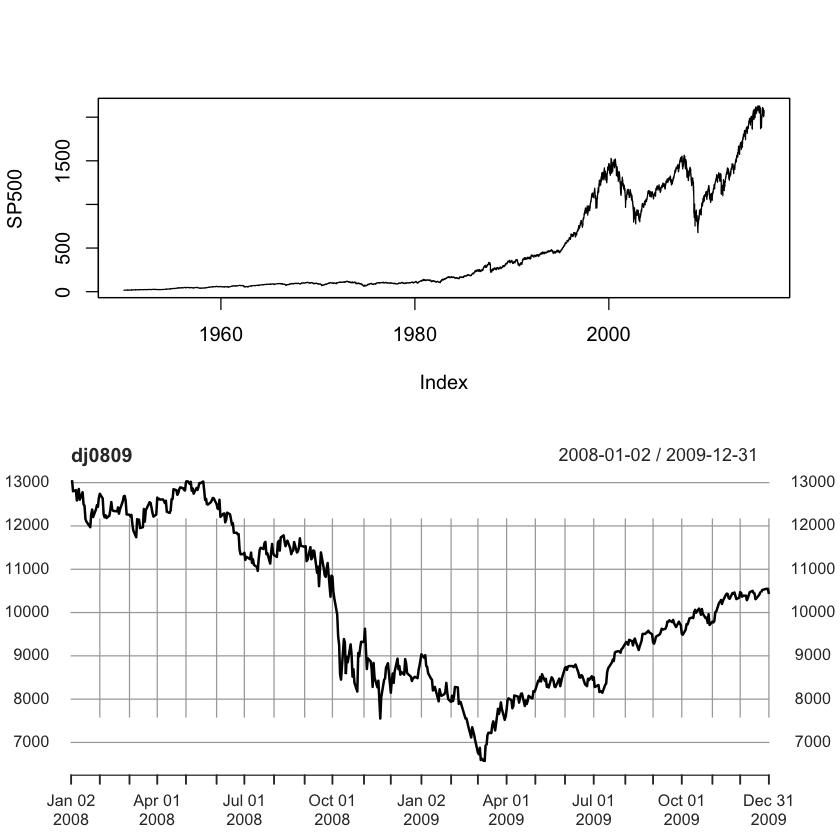

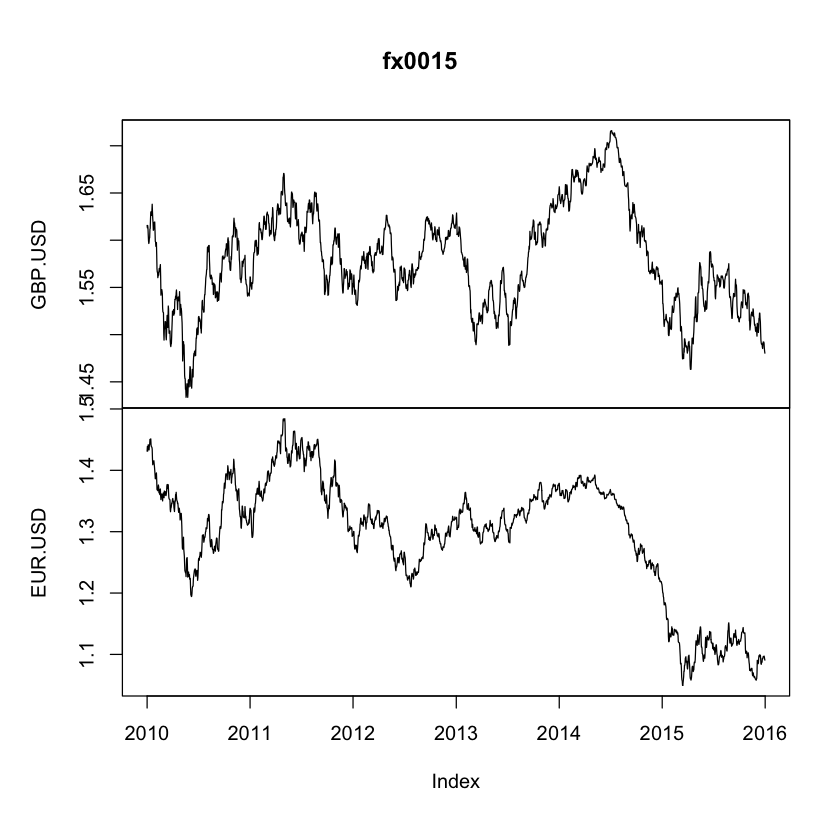

In [1]:
## load sp500 and dj  show plots of all history of sp500 and crisis 2008 in dj
require(qrmdata)
require(zoo)
data(SP500)
data(DJ)
dj0809 <- DJ["2008-01-01::2009-12-31"]
par(mfrow=c(2,1))
plot.zoo(SP500)
plot(dj0809)

## fx data
data("GBP_USD")
data("EUR_USD")
fx <- merge(GBP_USD, EUR_USD, all=TRUE)
fx0015 <- fx["2010/2015",]
plot.zoo(fx0015)

### Risk factor returns

Let ($Z_t$) denote a time series of risk factor values
Returns can be defined
* simple returns $X_t = Z_t - Z_{t-1}$

* relative returns $X_t = \frac{Z_t - Z_{t-1}}{Z_{t-1}}$

* **log returns** $X_t = ln(Z_t) - ln(Z_{t-1})$

**properties of log returns**

* $ln(Z_t) - ln(Z_{t-1}) \approx \frac{Z_t - Z_{t-1}}{Z_{t-1}}$

* easy to aggregate to obtain longer interval log-returns

* independent normal if risk factors follow geometric Brownian motion (GBM)


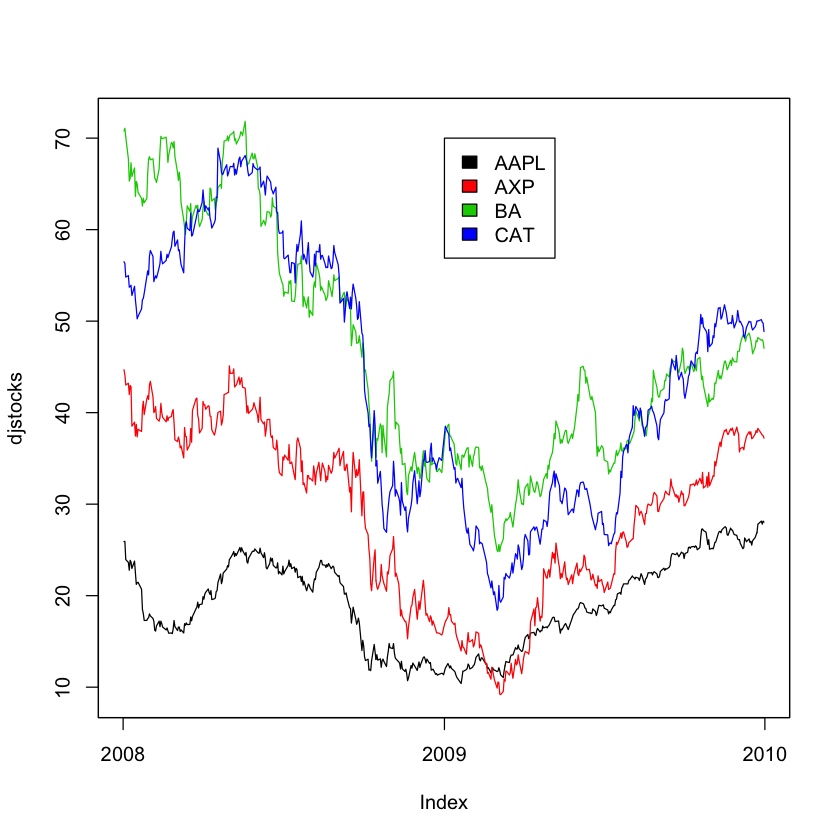

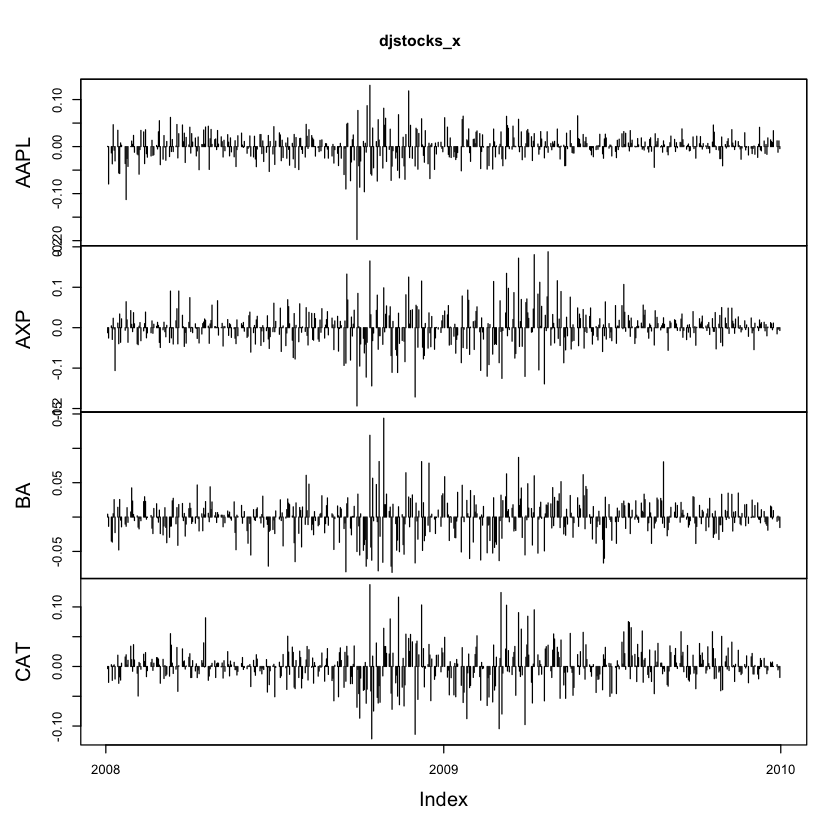

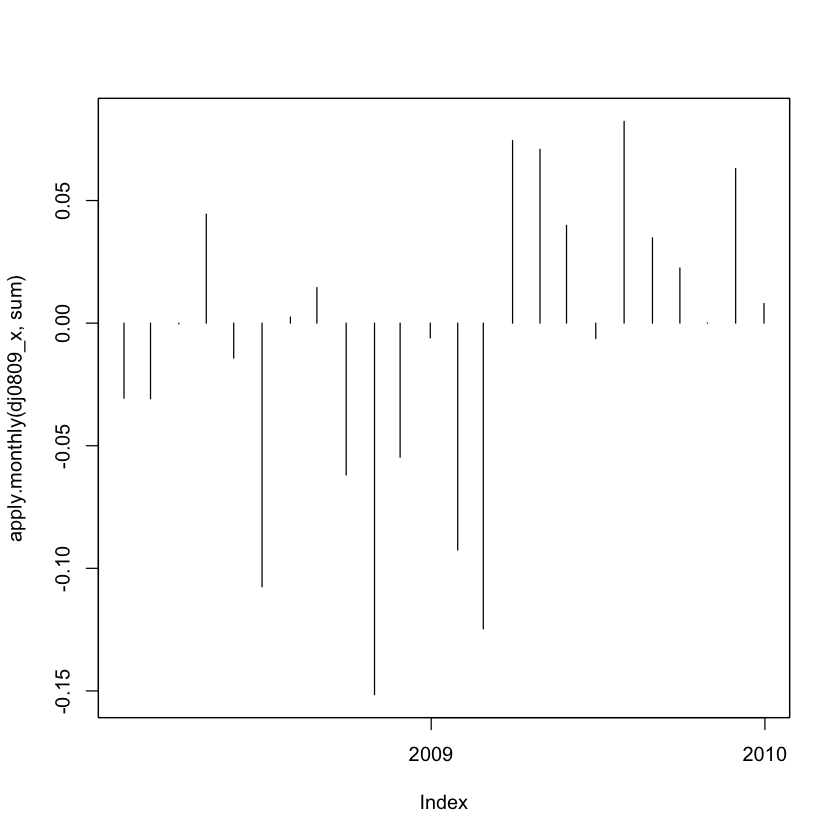

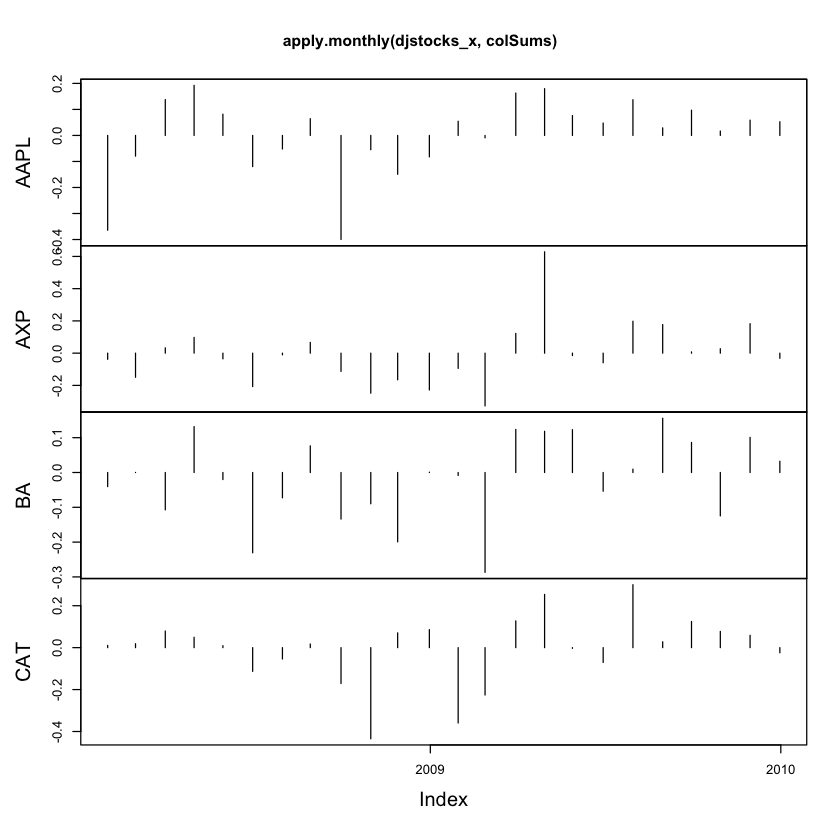

In [11]:
##plotting log returns
require(xts)

data(DJ_const)
djstocks <- DJ_const["2008/2009",c("AAPL", "AXP", "BA", "CAT")]

plot.zoo(djstocks, plot.type="single", col=c(1,2,3,4))
legend(julian(x = as.Date("2009-01-01")), y = 70, legend = names(DJ_const)[1:4], fill = 1:4)

djstocks_x <- diff(log(djstocks))[-1] #strip off 1st NA value
plot.zoo(djstocks_x, type="h")

dj0809_x <- diff(log(dj0809))[-1]

##use apply to aggregate log returns to longer periods
plot.zoo(apply.monthly(dj0809_x,sum),type="h")

#same aggregartion of log returns with multi-column xts object
plot.zoo(apply.monthly(djstocks_x,colSums), type="h")

### Yields as risk factors
** yield ** $y(t,T)$ at time t of maturity T
$$y(t,T) = \frac{-ln\,p(t,T)}{T-t}$$
where $p(t,T)$ is the price of maturity T at time t

y(t,10) : yield for a 10-year bond acquired at time 5

* the mapping T to y(t,T) is called a yield curve at time t

In low (negative) interest rate environments there are arguments to use simple returns of yields  over log-returns

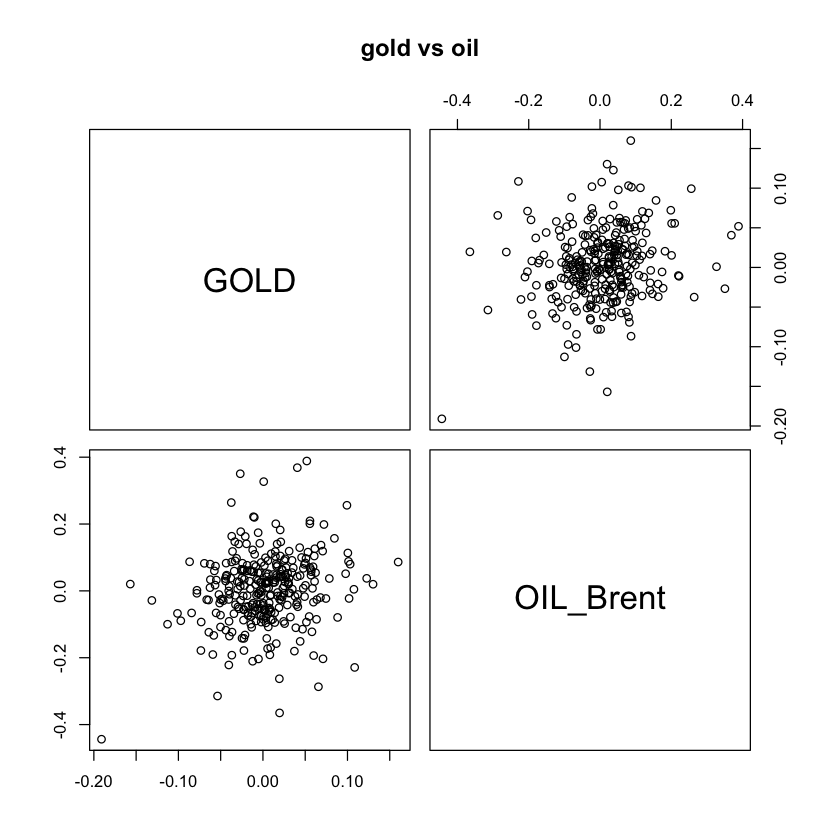

In [13]:
### commo data

data("GOLD")
data("OIL_Brent")

gold<-GOLD["1990::",]
oil <- OIL_Brent["1990::",]

##daily log returns
goldx <-diff(log(gold))[-1]
oilx <- diff(log(oil))[-1]

##monthly 
goldx_m <- apply.monthly(goldx, sum)
oilx_m <- apply.monthly(oilx, sum)

coms <- merge(goldx_m, oilx_m)
## see correlation between gold and oil
pairs(as.zoo(coms),main="gold vs oil")


[1] "0.25y"  "0.50y"  "0.75y"  "1.00y"  "1.25y"  "1.50y"  "1.75y"  "2.00y" 
  [9] "2.25y"  "2.50y"  "2.75y"  "3.00y"  "3.25y"  "3.50y"  "3.75y"  "4.00y" 
 [17] "4.25y"  "4.50y"  "4.75y"  "5.00y"  "5.25y"  "5.50y"  "5.75y"  "6.00y" 
 [25] "6.25y"  "6.50y"  "6.75y"  "7.00y"  "7.25y"  "7.50y"  "7.75y"  "8.00y" 
 [33] "8.25y"  "8.50y"  "8.75y"  "9.00y"  "9.25y"  "9.50y"  "9.75y"  "10.00y"
 [41] "10.25y" "10.50y" "10.75y" "11.00y" "11.25y" "11.50y" "11.75y" "12.00y"
 [49] "12.25y" "12.50y" "12.75y" "13.00y" "13.25y" "13.50y" "13.75y" "14.00y"
 [57] "14.25y" "14.50y" "14.75y" "15.00y" "15.25y" "15.50y" "15.75y" "16.00y"
 [65] "16.25y" "16.50y" "16.75y" "17.00y" "17.25y" "17.50y" "17.75y" "18.00y"
 [73] "18.25y" "18.50y" "18.75y" "19.00y" "19.25y" "19.50y" "19.75y" "20.00y"
 [81] "20.25y" "20.50y" "20.75y" "21.00y" "21.25y" "21.50y" "21.75y" "22.00y"
 [89] "22.25y" "22.50y" "22.75y" "23.00y" "23.25y" "23.50y" "23.75y" "24.00y"
 [97] "24.25y" "24.50y" "24.75y" "25.00y" "25.25y" "25.50y" "25.75y" "26.00y"
[105] "26.25y" "26.50y" "26.75y" "27.00y" "27.25y" "27.50y" "27.75y" "28.00y"
[113] "28.25y" "28.50y" "28.75y" "29.00y" "29.25y" "29.50y" "29.75y" "30.00y"

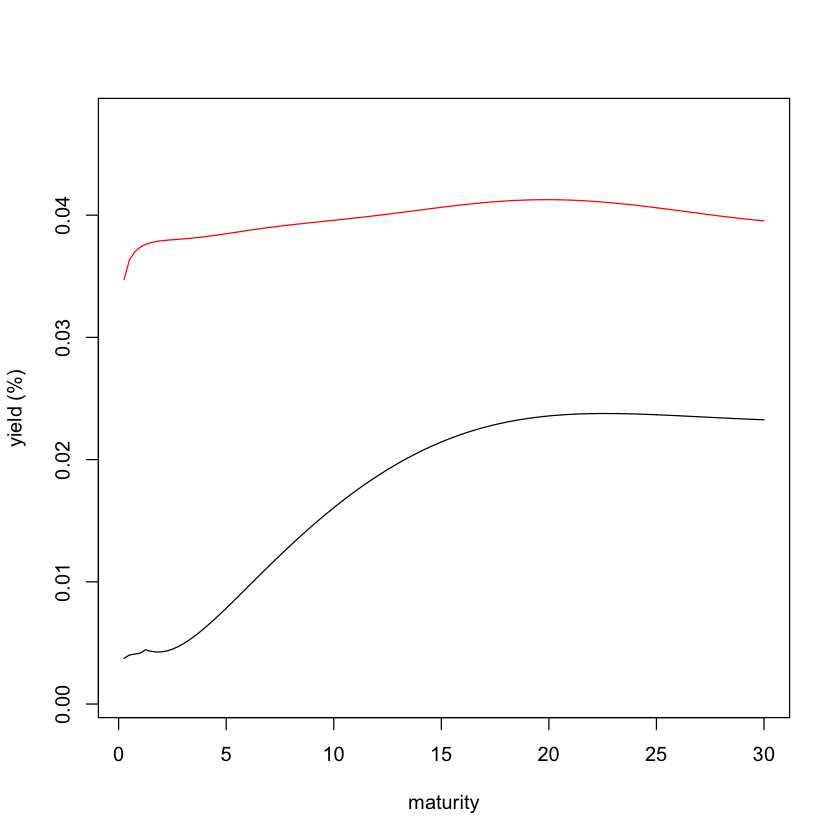

In [14]:
## plot term structure

##interest data
data("ZCB_CA")
zcb <- ZCB_CA["2006::",]
names(zcb)

#log returns
zcb_x <- diff(log(zcb))[-1]

maturity <- (1:120)/4
# Plot the yield curve for the first day of zcb
plot(maturity, zcb[1,], ylim = range(zcb), type = "l",
     ylab = "yield (%)", col = "red")
## add the yeild curve from the last day of zcb
lines(maturity, zcb[nrow(zcb),])



## Chapter 2  Real World returns are riskier than normal